In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(1950,2050)]
i =0
result = np.zeros((1200,950))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1950-2050/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.'+yy+'-'+mm +'-01.SST.nc')
        PREC_F = data.variables['SST'][0,:,:]
        lont = data.variables['TLONG'][:,:]
        latt = data.variables['TLAT'][:,:]
        #lont = lont[280:344,700:950]
        #latt = latt[280:344,700:950]
        PREC_F = PREC_F[200:600,550:1500]

        
        aveplot = PREC_F.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
qq = result.mean(axis=1)
data1 = qq.reshape(100,12)

In [5]:
qq2 = data1.mean(axis=1)
ttq= qq2.mean()
tt3q= qq2-ttq

In [6]:
ww2 = np.convolve(qq, np.ones((60,))/60, mode='valid')

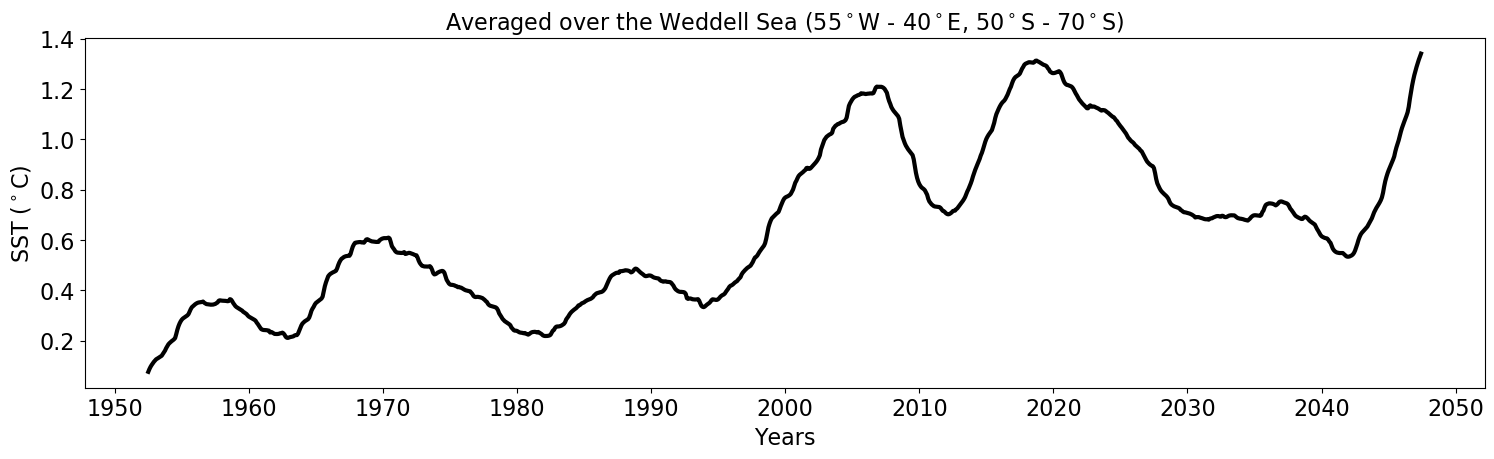

In [8]:
t=np.arange(30,1170,1)
my_font = {'fontname':'Cambria', 'size':'16'}
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.2, 0.1, 0.7, 0.7])
ax0.plot(t,ww2[:1140],'k',linewidth=3)

plt.ylabel('SST ($^\circ$C)',**my_font)
plt.xticks(range(0,1201,120), ['1950', '1960', '1970', '1980','1990','2000','2010','2020','2030','2040','2050'],**my_font)
#plt.hlines(ttq, 0, 1200, colors = "blue",linestyles = "dashed")
plt.xlabel('Years',**my_font)
plt.yticks(**my_font)
ax0.yaxis.label.set_color('k')
plt.title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font )
plt.savefig("WS.png",bbox_inches='tight',dpi=fig.dpi)